In [23]:
import semopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph
from IPython.display import display, Image

In [25]:
# Step 1: Load the Data and Preprocess
data = pd.read_csv ('Worland5a.csv')
data.columns = data.columns.str.strip()  # Remove any spaces in column names

In [21]:
print(data.head())

       motiv       harm     stabi     ppsych        ses     verbal      read  \
0  -7.907122  -5.075312 -3.138836 -17.800210   4.766450  -3.633360 -3.488981   
1   1.751478  -4.155847  3.520752   7.009367  -6.048681  -7.693461 -4.520552   
2  14.472570  -4.540677  4.070600  23.734260 -16.970670  -3.909941 -4.818170   
3  -1.165421  -5.668406  2.600437   1.493158   1.396363  21.409450 -3.138441   
4  -4.222899 -10.072150 -6.030737  -5.985864 -18.376400  -1.438816 -2.009742   

      arith     spell  
0 -9.989121 -6.567873  
1  8.196238  8.778973  
2  7.529984 -5.688716  
3  5.730547 -2.915676  
4 -0.623953 -1.024624  


In [47]:
# Step 2: Define the SEM Model Specification

model_spec = """
# Measurement Model
adjust =~ motiv + harm + stabi
risk =~ verbal + ppsych + ses
achieve =~ read + arith + spell

# Regressions
 achieve ~ adjust + risk     # H1: adjustment + risk → achievement

read ~~ arith
"""

In [69]:
import pandas as pd
from IPython.display import display  # Import display for Jupyter Notebook

corr_matrix = data.corr()
print("Correlation Matrix:")
print(corr_matrix)

threshold = 0.70
high_corr_pairs = []

# Identify highly correlated variable pairs
abs_corr = corr_matrix.abs()
columns = abs_corr.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if abs_corr.iloc[i, j] > threshold:
            high_corr_pairs.append((columns[i], columns[j], abs_corr.iloc[i, j]))

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Variable 1", "Variable 2", "Correlation"])
    print("\nHighly Correlated Variables:")
    display(high_corr_df)
else:
    print("\n✅ No highly correlated variable pairs found (|correlation| > 0.70).")


Correlation Matrix:
        motiv  harm  stabi  ppsych   ses  verbal  read  arith  spell
motiv    1.00  0.77   0.59   -0.25  0.25    0.32  0.53   0.60   0.59
harm     0.77  1.00   0.58   -0.25  0.26    0.25  0.42   0.44   0.45
stabi    0.59  0.58   1.00   -0.16  0.18    0.27  0.36   0.38   0.38
ppsych  -0.25 -0.25  -0.16    1.00 -0.42   -0.40 -0.39  -0.24  -0.31
ses      0.25  0.26   0.18   -0.42  1.00    0.40  0.43   0.37   0.33
verbal   0.32  0.25   0.27   -0.40  0.40    1.00  0.56   0.49   0.48
read     0.53  0.42   0.36   -0.39  0.43    0.56  1.00   0.73   0.87
arith    0.60  0.44   0.38   -0.24  0.37    0.49  0.73   1.00   0.72
spell    0.59  0.45   0.38   -0.31  0.33    0.48  0.87   0.72   1.00

Highly Correlated Variables:


,Variable 1,Variable 2,Correlation
0,motiv,harm,0.77
1,read,arith,0.73
2,read,spell,0.87
3,arith,spell,0.72


In [49]:
model = semopy.Model(model_spec)
fitted = True

try:
    model.fit(data)
except np.linalg.LinAlgError as e:
    fitted = False
    print("\n❌ Singular matrix error: This may be due to multicollinearity or insufficient variation.")
except Exception as e:
    fitted = False
    print(f"\n❌ Error fitting the model: {e}")

In [39]:
# Step 4: Display Model Parameter Estimates
# =============================================================================
if fitted:
    params = model.inspect()
    print("\n✅ Model Parameter Estimates:")
    display(params)

else:
    print("\n❌ Model was not successfully fitted.")


✅ Model Parameter Estimates:


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,achieve,~,adjust,0.377772,0.046393,8.142937,0.0
1,achieve,~,risk,0.726528,0.079284,9.163606,0.0
2,motiv,~,adjust,1.000000,-,-,-
3,harm,~,adjust,0.886080,0.040846,21.69336,0.0
4,stabi,~,adjust,0.694927,0.043866,15.842047,0.0
5,verbal,~,risk,1.000000,-,-,-
6,ppsych,~,risk,-0.780644,0.076917,-10.149119,0.0
7,ses,~,risk,0.818784,0.077718,10.535331,0.0
8,read,~,achieve,1.000000,-,-,-
9,arith,~,achieve,0.838096,0.034225,24.487805,0.0


In [51]:
# =============================================================================
# Step 4.1: Display Model Parameter Estimates
# =============================================================================

# Ensure model is fitted before displaying results
if fitted:
    # Display all 130 rows of model parameter estimates (full output)
   #  print("\n✅ Full Model Parameter Estimates (130 rows):")     FULL MODEL PARAMETER 
    # Uncomment the line below to display all 130 rows if needed
    # display(params)  

    # Extract and display only the 11 regressions
    regression_params = params[params['op'] == '~']
    print("\n✅ Model Parameter Estimates for the Regressions:")
    display(regression_params)
else:
    print("\n❌ Model Parameter Estimates: Not computed due to model fitting error.")


✅ Model Parameter Estimates for the Regressions:


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,achieve,~,adjust,0.377772,0.046393,8.142937,0.0
1,achieve,~,risk,0.726528,0.079284,9.163606,0.0
2,motiv,~,adjust,1.000000,-,-,-
3,harm,~,adjust,0.886080,0.040846,21.69336,0.0
4,stabi,~,adjust,0.694927,0.043866,15.842047,0.0
5,verbal,~,risk,1.000000,-,-,-
6,ppsych,~,risk,-0.780644,0.076917,-10.149119,0.0
7,ses,~,risk,0.818784,0.077718,10.535331,0.0
8,read,~,achieve,1.000000,-,-,-
9,arith,~,achieve,0.838096,0.034225,24.487805,0.0


In [53]:
# =============================================================================
# Step 5: Compute and Display Model Fit Indices
# =============================================================================
if fitted:
    fit_stats = semopy.calc_stats(model)
    print("\n✅ Model Fit Indices:")
    display(fit_stats)

else:
    print("\n❌ Model Fit Indices: Not computed due to model fitting error.")


✅ Model Fit Indices:


,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,23,36,139.677185,0.0,2597.971946,0.954458,0.946236,0.915848,0.946236,0.928717,0.100827,43.441291,136.162669,0.279354



✅ Predicted Latent Factors (First 10 Rows):


,achieve,adjust,risk
0,-5.020620,-6.562673,0.855216
1,1.357178,0.591106,-3.535651
2,-3.518838,7.666414,-7.964395
3,-1.137390,-1.791230,5.265089
4,-1.943014,-5.429704,-2.926687
5,0.931488,2.940303,-3.914382
6,-1.454401,7.674328,0.501285
7,-7.298006,-1.801597,-2.704083
8,0.099438,-12.317258,-0.064739
9,-4.069096,1.429510,-5.615453



Generating Clean Path Diagram:


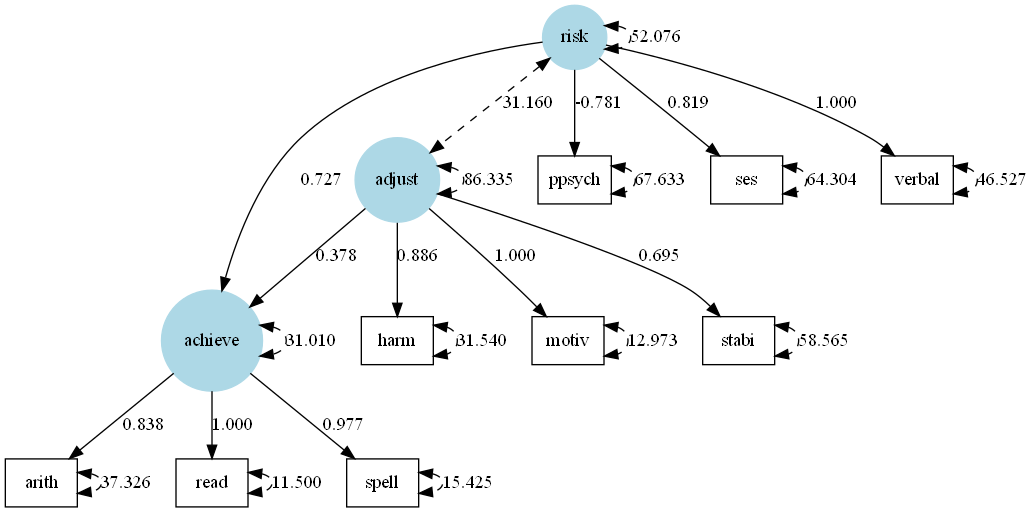

✅ Clean path diagram displayed inline.



In [57]:
# =============================================================================
# Step 8: Generate and Display Path Diagram
# =============================================================================
def display_clean_path_diagram(model, params=None, format='png'):
    dot = Digraph(format=format)

    # Add latent variables as circles
    for latent in model.vars['latent']:
        dot.node(latent, latent, shape='circle', style='filled', color='lightblue')

    # Add observed variables as rectangles
    for observed in model.vars['observed']:
        dot.node(observed, observed, shape='rectangle')

    # Add paths based on parameter estimates (if available)
    if params is not None:
        for _, row in params.iterrows():
            op = row['op']
            if op == '=~':  # Measurement (factor loadings)
                dot.edge(row['lval'], row['rval'], label=f"{row['Estimate']:.3f}")
            elif op == '~':  # Regression paths
                dot.edge(row['rval'], row['lval'], label=f"{row['Estimate']:.3f}")
            elif op == '~~':  # Covariances
                dot.edge(row['lval'], row['rval'], dir='both', style='dashed', label=f"{row['Estimate']:.3f}")

    try:
        # Get image data from Graphviz and display inline
        png_data = dot.pipe(format=format)
        display(Image(data=png_data))
        print("✅ Clean path diagram displayed inline.\n")
    except Exception as e:
        print("❌ Error displaying the clean path diagram:", e)

if fitted:
    print("\nGenerating Clean Path Diagram:")
    display_clean_path_diagram(model, params)
else:
    print("\n❌ Path Diagram: Not generated due to model fitting error.")


In [38]:
from scipy.stats import norm
import numpy as np
from tabulate import tabulate

def test_mediation_no_bootstrap_prompt(params):
    """
    Tests the mediation effect (X → M → Y) WITHOUT bootstrapping, prompting user for X, M, Y.

    Computes:
    - Direct effects: X → M, M → Y
    - Indirect effect: X → M → Y (using Sobel's formula)
    - z-values and p-values for each path

    Parameters:
    - params: A DataFrame from model.inspect(std_est=True) in semopy
              (columns: lval, rval, Estimate, Std. Err, op).

    Example usage (assuming your model is already fitted):
        model.fit(data)
        params = model.inspect(std_est=True)
        test_mediation_no_bootstrap_prompt(params)
        # Then type e.g., X=C, M=B, Y=A when prompted
    """

    # Prompt the user for X, M, Y
    predictor = input("Enter the Predictor (X): ").strip()
    mediator  = input("Enter the Mediator  (M): ").strip()
    outcome   = input("Enter the Outcome   (Y): ").strip()

    # Extract the relevant paths from the parameters
    path_X_M = params[(params['lval'] == mediator) & (params['rval'] == predictor) & (params['op'] == '~')]
    path_M_Y = params[(params['lval'] == outcome) & (params['rval'] == mediator) & (params['op'] == '~')]

    # Check if required paths exist
    if path_X_M.empty or path_M_Y.empty:
        missing_paths = []
        if path_X_M.empty:
            missing_paths.append(f"{predictor} → {mediator}")
        if path_M_Y.empty:
            missing_paths.append(f"{mediator} → {outcome}")
        raise ValueError(f"❌ Missing paths: {', '.join(missing_paths)}\n"
                         f"Make sure your model specification matches these directions.")

    # Extract estimates and standard errors
    estimate_X_M = path_X_M['Estimate'].values[0]
    std_err_X_M  = path_X_M['Std. Err'].values[0]

    estimate_M_Y = path_M_Y['Estimate'].values[0]
    std_err_M_Y  = path_M_Y['Std. Err'].values[0]

    # Compute direct path z-values & p-values
    z_value_X_M  = estimate_X_M / std_err_X_M
    p_value_X_M  = 2 * (1 - norm.cdf(abs(z_value_X_M)))

    z_value_M_Y  = estimate_M_Y / std_err_M_Y
    p_value_M_Y  = 2 * (1 - norm.cdf(abs(z_value_M_Y)))

    # Compute indirect effect
    indirect_effect = estimate_X_M * estimate_M_Y

    # Sobel's formula for indirect std. err
    indirect_std_err = np.sqrt(
        (estimate_M_Y ** 2) * (std_err_X_M ** 2) +
        (estimate_X_M ** 2) * (std_err_M_Y ** 2)
    )

    # z-value & p-value for indirect effect
    z_value_indirect = indirect_effect / indirect_std_err
    p_value_indirect = 2 * (1 - norm.cdf(abs(z_value_indirect)))

    # Display the results in a table
    print(f"\n✅ Mediation Analysis (No Bootstrap): {predictor} → {mediator} → {outcome}")
    table = [
        [f"{predictor} → {mediator}", estimate_X_M, std_err_X_M, z_value_X_M, p_value_X_M],
        [f"{mediator} → {outcome}", estimate_M_Y, std_err_M_Y, z_value_M_Y, p_value_M_Y],
        [f"Indirect ({predictor} → {mediator} → {outcome})", indirect_effect, indirect_std_err, z_value_indirect, p_value_indirect]
    ]
    headers = ["Path", "Estimate", "Std. Err", "z-value", "p-value"]
    print(tabulate(table, headers=headers, tablefmt="pretty"))

    # Return results as a dictionary
    return {
        "paths": {
            f"{predictor} → {mediator}": {
                "estimate": estimate_X_M,
                "std_err": std_err_X_M,
                "z_value": z_value_X_M,
                "p_value": p_value_X_M
            },
            f"{mediator} → {outcome}": {
                "estimate": estimate_M_Y,
                "std_err": std_err_M_Y,
                "z_value": z_value_M_Y,
                "p_value": p_value_M_Y
            },
            f"Indirect ({predictor} → {mediator} → {outcome})": {
                "estimate": indirect_effect,
                "std_err": indirect_std_err,
                "z_value": z_value_indirect,
                "p_value": p_value_indirect
            }
        }
    }

# Example usage:
# 1. Fit your semopy model:
model.fit(data)
# 2. Inspect parameters:
params = model.inspect(std_est=True)
# 3. Run the mediation function, then type e.g. X=C, M=B, Y=A
test_mediation_no_bootstrap_prompt(params)#call


Enter the Predictor (X):  PC
Enter the Mediator  (M):  CEB
Enter the Outcome   (Y):  CA



✅ Mediation Analysis (No Bootstrap): PC → CEB → CA
+--------------------------+---------------------+---------------------+--------------------+-----------------------+
|           Path           |      Estimate       |      Std. Err       |      z-value       |        p-value        |
+--------------------------+---------------------+---------------------+--------------------+-----------------------+
|         PC → CEB         | 0.19897991363610507 | 0.22367567430216223 | 0.8895912094906852 |  0.37368542803071714  |
|         CEB → CA         | 0.2811875685397581  | 0.06354722887861719 | 4.424859643791235  | 9.650500636393389e-06 |
| Indirect (PC → CEB → CA) | 0.05595067810358745 | 0.06415329083736843 | 0.8721404213764344 |  0.3831317770853684   |
+--------------------------+---------------------+---------------------+--------------------+-----------------------+


{'paths': {'PC → CEB': {'estimate': 0.19897991363610507,
   'std_err': 0.22367567430216223,
   'z_value': 0.8895912094906852,
   'p_value': 0.37368542803071714},
  'CEB → CA': {'estimate': 0.2811875685397581,
   'std_err': 0.06354722887861719,
   'z_value': 4.424859643791235,
   'p_value': 9.650500636393389e-06},
  'Indirect (PC → CEB → CA)': {'estimate': 0.05595067810358745,
   'std_err': 0.06415329083736843,
   'z_value': 0.8721404213764344,
   'p_value': 0.3831317770853684}}}

In [40]:
test_mediation_no_bootstrap_prompt(params)#call

Enter the Predictor (X):  MI
Enter the Mediator  (M):  CEB
Enter the Outcome   (Y):  CA



✅ Mediation Analysis (No Bootstrap): MI → CEB → CA
+--------------------------+----------------------+----------------------+---------------------+-----------------------+
|           Path           |       Estimate       |       Std. Err       |       z-value       |        p-value        |
+--------------------------+----------------------+----------------------+---------------------+-----------------------+
|         MI → CEB         | -0.09815151111056981 | 0.07468873144486825  | -1.314140824349396  |  0.1887988180083684   |
|         CEB → CA         |  0.2811875685397581  | 0.06354722887861719  |  4.424859643791235  | 9.650500636393389e-06 |
| Indirect (MI → CEB → CA) | -0.02759898475768418 | 0.021908175844172376 | -1.2597573140725713 |  0.2077569227144247   |
+--------------------------+----------------------+----------------------+---------------------+-----------------------+


{'paths': {'MI → CEB': {'estimate': -0.09815151111056981,
   'std_err': 0.07468873144486825,
   'z_value': -1.314140824349396,
   'p_value': 0.1887988180083684},
  'CEB → CA': {'estimate': 0.2811875685397581,
   'std_err': 0.06354722887861719,
   'z_value': 4.424859643791235,
   'p_value': 9.650500636393389e-06},
  'Indirect (MI → CEB → CA)': {'estimate': -0.02759898475768418,
   'std_err': 0.021908175844172376,
   'z_value': -1.2597573140725713,
   'p_value': 0.2077569227144247}}}

In [42]:
test_mediation_no_bootstrap_prompt(params)#call

Enter the Predictor (X):  CF
Enter the Mediator  (M):  CEB
Enter the Outcome   (Y):  CA



✅ Mediation Analysis (No Bootstrap): CF → CEB → CA
+--------------------------+--------------------+----------------------+--------------------+-----------------------+
|           Path           |      Estimate      |       Std. Err       |      z-value       |        p-value        |
+--------------------------+--------------------+----------------------+--------------------+-----------------------+
|         CF → CEB         | 0.2179169149757541 | 0.06867421459011865  | 3.1731985036361756 | 0.0015076940306413267 |
|         CEB → CA         | 0.2811875685397581 | 0.06354722887861719  | 4.424859643791235  | 9.650500636393389e-06 |
| Indirect (CF → CEB → CA) | 0.0612755274657175 | 0.023762504145248428 | 2.578664567133604  | 0.009918304424792579  |
+--------------------------+--------------------+----------------------+--------------------+-----------------------+


{'paths': {'CF → CEB': {'estimate': 0.2179169149757541,
   'std_err': 0.06867421459011865,
   'z_value': 3.1731985036361756,
   'p_value': 0.0015076940306413267},
  'CEB → CA': {'estimate': 0.2811875685397581,
   'std_err': 0.06354722887861719,
   'z_value': 4.424859643791235,
   'p_value': 9.650500636393389e-06},
  'Indirect (CF → CEB → CA)': {'estimate': 0.0612755274657175,
   'std_err': 0.023762504145248428,
   'z_value': 2.578664567133604,
   'p_value': 0.009918304424792579}}}

In [44]:
test_mediation_no_bootstrap_prompt(params)#call


Enter the Predictor (X):  SC
Enter the Mediator  (M):  CEB
Enter the Outcome   (Y):  CA



✅ Mediation Analysis (No Bootstrap): SC → CEB → CA
+--------------------------+---------------------+---------------------+-------------------+-----------------------+
|           Path           |      Estimate       |      Std. Err       |      z-value      |        p-value        |
+--------------------------+---------------------+---------------------+-------------------+-----------------------+
|         SC → CEB         | 0.3530925342757065  | 0.07807303649377453 | 4.522592563744613 | 6.108675807636743e-06 |
|         CEB → CA         | 0.2811875685397581  | 0.06354722887861719 | 4.424859643791235 | 9.650500636393389e-06 |
| Indirect (SC → CEB → CA) | 0.09928523118252712 | 0.03139120475780974 | 3.162835958305366 | 0.001562403437355142  |
+--------------------------+---------------------+---------------------+-------------------+-----------------------+


{'paths': {'SC → CEB': {'estimate': 0.3530925342757065,
   'std_err': 0.07807303649377453,
   'z_value': 4.522592563744613,
   'p_value': 6.108675807636743e-06},
  'CEB → CA': {'estimate': 0.2811875685397581,
   'std_err': 0.06354722887861719,
   'z_value': 4.424859643791235,
   'p_value': 9.650500636393389e-06},
  'Indirect (SC → CEB → CA)': {'estimate': 0.09928523118252712,
   'std_err': 0.03139120475780974,
   'z_value': 3.162835958305366,
   'p_value': 0.001562403437355142}}}

In [46]:
test_mediation_no_bootstrap_prompt(params)#call


Enter the Predictor (X):  Emotion
Enter the Mediator  (M):  CEB
Enter the Outcome   (Y):  CA



✅ Mediation Analysis (No Bootstrap): Emotion → CEB → CA
+-------------------------------+----------------------+----------------------+--------------------+-----------------------+
|             Path              |       Estimate       |       Std. Err       |      z-value       |        p-value        |
+-------------------------------+----------------------+----------------------+--------------------+-----------------------+
|         Emotion → CEB         | 0.047584593154179726 | 0.03804862482784287  | 1.2506258339029042 |  0.2110710207676394   |
|           CEB → CA            |  0.2811875685397581  | 0.06354722887861719  | 4.424859643791235  | 9.650500636393389e-06 |
| Indirect (Emotion → CEB → CA) | 0.013380196048977416 | 0.011117918502052824 | 1.2034803139190922 |  0.22879050489236752  |
+-------------------------------+----------------------+----------------------+--------------------+-----------------------+


{'paths': {'Emotion → CEB': {'estimate': 0.047584593154179726,
   'std_err': 0.03804862482784287,
   'z_value': 1.2506258339029042,
   'p_value': 0.2110710207676394},
  'CEB → CA': {'estimate': 0.2811875685397581,
   'std_err': 0.06354722887861719,
   'z_value': 4.424859643791235,
   'p_value': 9.650500636393389e-06},
  'Indirect (Emotion → CEB → CA)': {'estimate': 0.013380196048977416,
   'std_err': 0.011117918502052824,
   'z_value': 1.2034803139190922,
   'p_value': 0.22879050489236752}}}

In [48]:
test_mediation_no_bootstrap_prompt(params)#call

Enter the Predictor (X):  PB
Enter the Mediator  (M):  CEB
Enter the Outcome   (Y):  CA



✅ Mediation Analysis (No Bootstrap): PB → CEB → CA
+--------------------------+-----------------------+---------------------+----------------------+-----------------------+
|           Path           |       Estimate        |      Std. Err       |       z-value        |        p-value        |
+--------------------------+-----------------------+---------------------+----------------------+-----------------------+
|         PB → CEB         | -0.011495485064268476 | 0.18466750535070475 | -0.06224963640699663 |  0.9503640349668141   |
|         CEB → CA         |  0.2811875685397581   | 0.06354722887861719 |  4.424859643791235   | 9.650500636393389e-06 |
| Indirect (PB → CEB → CA) | -0.003232387494406758 | 0.05193134500309095 | -0.06224347731056006 |  0.9503689397035298   |
+--------------------------+-----------------------+---------------------+----------------------+-----------------------+


{'paths': {'PB → CEB': {'estimate': -0.011495485064268476,
   'std_err': 0.18466750535070475,
   'z_value': -0.06224963640699663,
   'p_value': 0.9503640349668141},
  'CEB → CA': {'estimate': 0.2811875685397581,
   'std_err': 0.06354722887861719,
   'z_value': 4.424859643791235,
   'p_value': 9.650500636393389e-06},
  'Indirect (PB → CEB → CA)': {'estimate': -0.003232387494406758,
   'std_err': 0.05193134500309095,
   'z_value': -0.06224347731056006,
   'p_value': 0.9503689397035298}}}